In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

In [2]:
import warnings
warnings.filterwarnings('ignore')

### The churn rate measures a company's loss in subscribers for a given period of time. 

In [3]:
df = pd.read_csv("telecommunications_churn.csv")
df.head()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0


In [4]:
df.describe()

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,0.276628,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,0.096910,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,59.449754,0.144914
std,39.822106,0.447398,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,0.295879,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,10.502261,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,22.930000,0.000000
25%,74.000000,0.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,0.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,52.380000,0.000000
50%,101.000000,0.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,0.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,59.470000,0.000000
75%,127.000000,1.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,0.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,66.480000,0.000000
max,243.000000,1.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,1.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,96.150000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account_length          3333 non-null   int64  
 1   voice_mail_plan         3333 non-null   int64  
 2   voice_mail_messages     3333 non-null   int64  
 3   day_mins                3333 non-null   float64
 4   evening_mins            3333 non-null   float64
 5   night_mins              3333 non-null   float64
 6   international_mins      3333 non-null   float64
 7   customer_service_calls  3333 non-null   int64  
 8   international_plan      3333 non-null   int64  
 9   day_calls               3333 non-null   int64  
 10  day_charge              3333 non-null   float64
 11  evening_calls           3333 non-null   int64  
 12  evening_charge          3333 non-null   float64
 13  night_calls             3333 non-null   int64  
 14  night_charge            3333 non-null   

In [6]:
# import dtale
# import pandas as pd
# d = dtale.show(df)
# d.open_browser()

## There is no null values

In [7]:
df['churn'].unique()

array([0, 1])

In [8]:
df['churn'].value_counts()

churn
0    2850
1     483
Name: count, dtype: int64

In [9]:
df.shape

(3333, 19)

# Heatmap for null value

<Axes: >

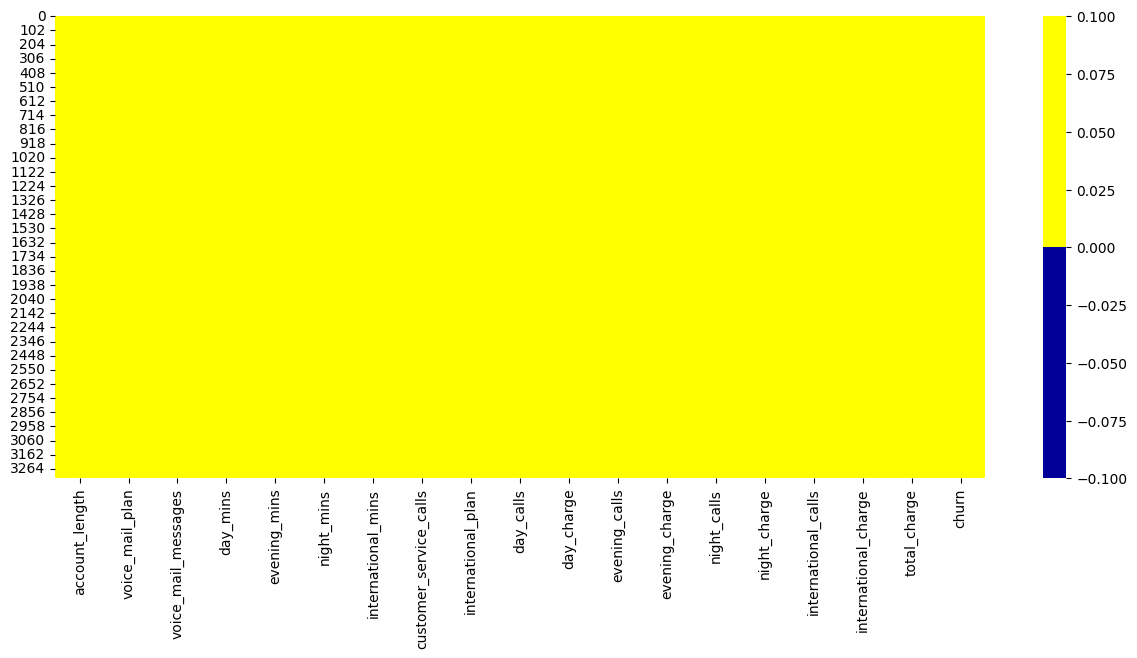

In [10]:
import seaborn as sns
plt.figure(figsize=(15,6))
cols = df.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=sns.color_palette(colours))

### churn is the target variable. It is the one that determines whether the client is still in the company or not.


#### 0-No Churn or loyal customer (customer is still with the company)
#### 1-Churn (Customer left the company)

<Axes: xlabel='churn'>

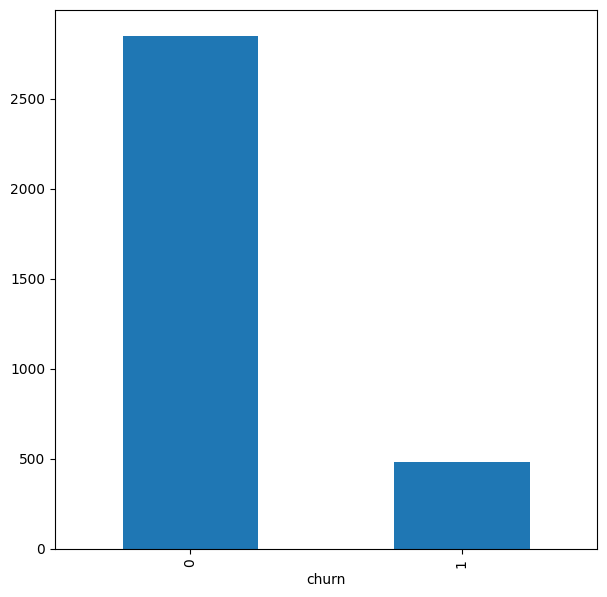

In [11]:
plt.figure(figsize=(7,7))

df["churn"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

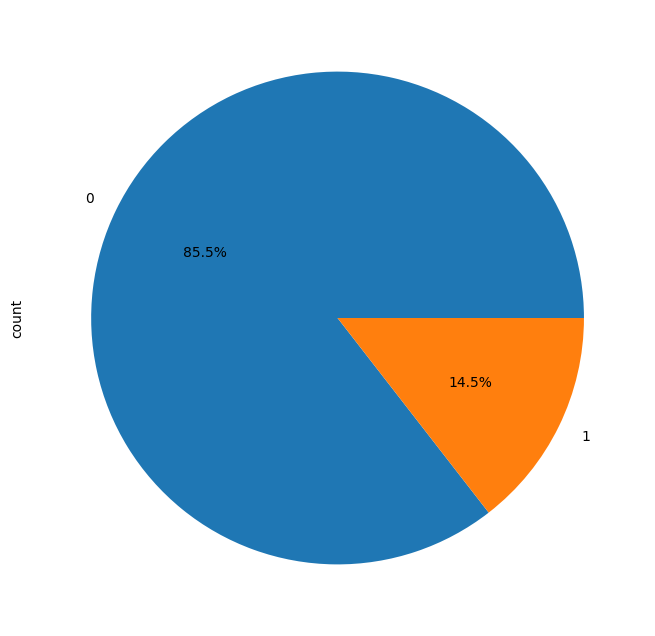

In [12]:
plt.figure(figsize=(10,8))
df["churn"].value_counts().plot(kind="pie",autopct="%1.1f%%")

In [13]:
#x=df.iloc[:,0:18]
#y=df['churn']

# Churn rate

In [14]:
cr=(df.shape[0]-df.churn.value_counts()[0])/df.shape[0]
print('Churn rate is {}%'.format(round(cr*100,2)))

Churn rate is 14.49%


#### 14.49% of the telecom customers left the company

## EDA of Calls, Minutes and Charges

### Calls

array([[<Axes: title={'center': 'account_length'}>,
        <Axes: title={'center': 'voice_mail_plan'}>,
        <Axes: title={'center': 'voice_mail_messages'}>,
        <Axes: title={'center': 'day_mins'}>],
       [<Axes: title={'center': 'evening_mins'}>,
        <Axes: title={'center': 'night_mins'}>,
        <Axes: title={'center': 'international_mins'}>,
        <Axes: title={'center': 'customer_service_calls'}>],
       [<Axes: title={'center': 'international_plan'}>,
        <Axes: title={'center': 'day_calls'}>,
        <Axes: title={'center': 'day_charge'}>,
        <Axes: title={'center': 'evening_calls'}>],
       [<Axes: title={'center': 'evening_charge'}>,
        <Axes: title={'center': 'night_calls'}>,
        <Axes: title={'center': 'night_charge'}>,
        <Axes: title={'center': 'international_calls'}>],
       [<Axes: title={'center': 'international_charge'}>,
        <Axes: title={'center': 'total_charge'}>,
        <Axes: title={'center': 'churn'}>, <Axes: >]], d

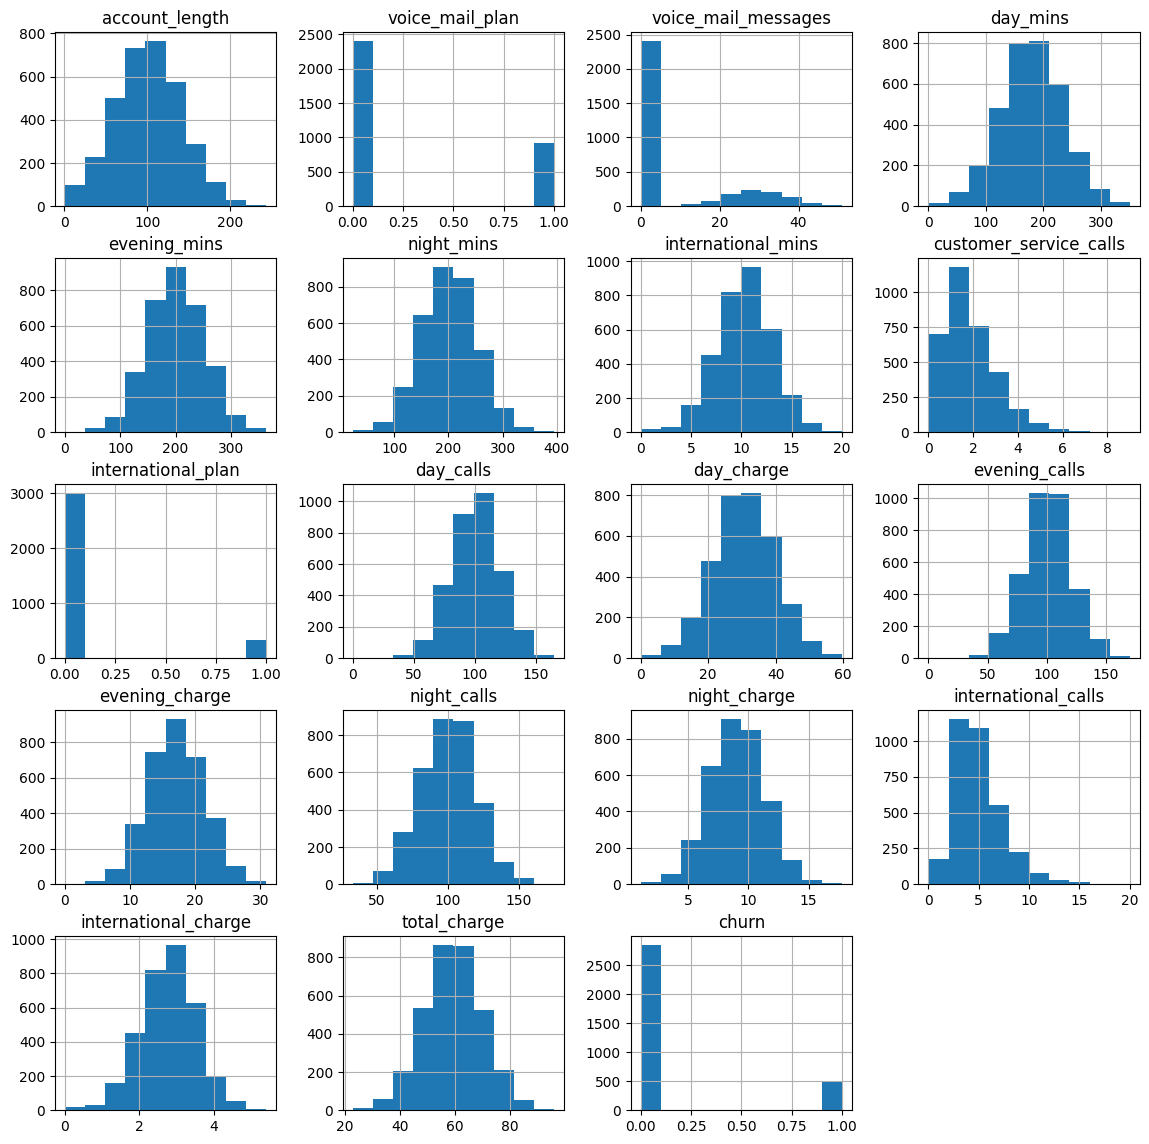

In [15]:
df.hist(figsize=(14,14))

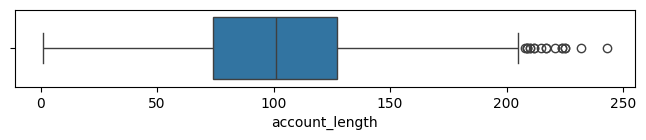

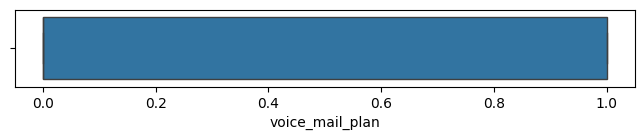

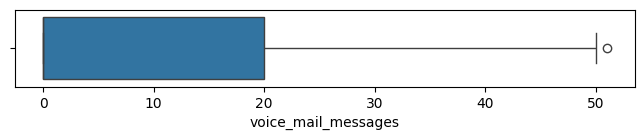

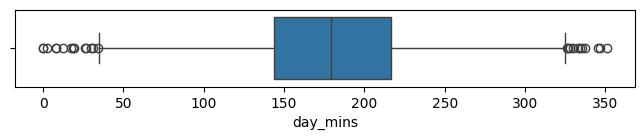

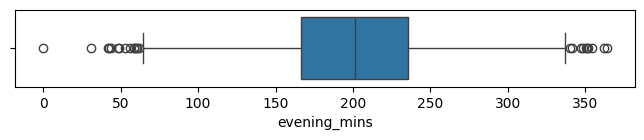

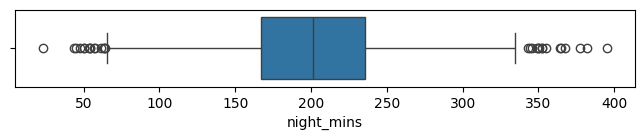

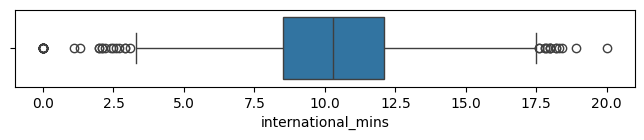

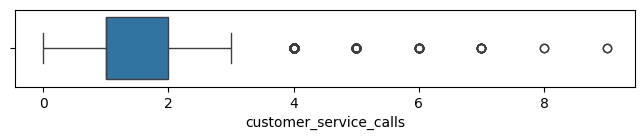

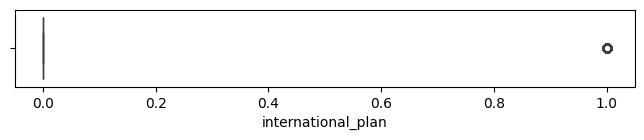

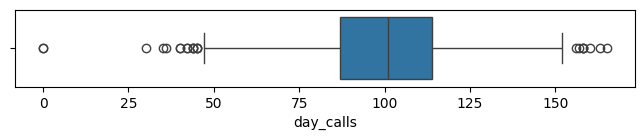

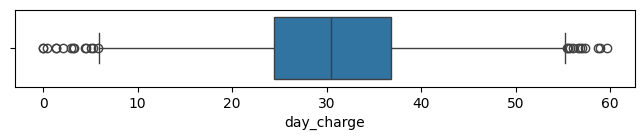

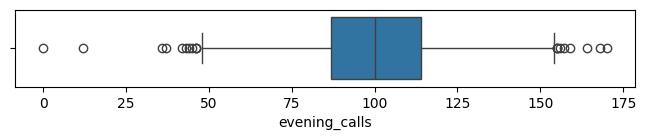

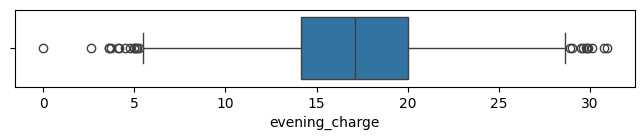

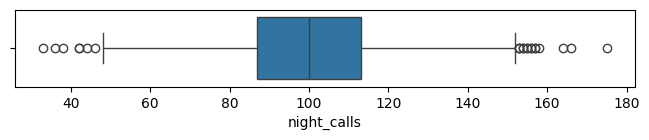

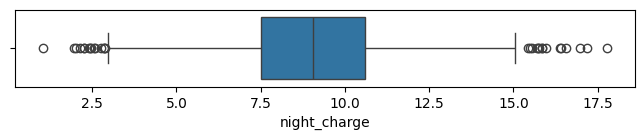

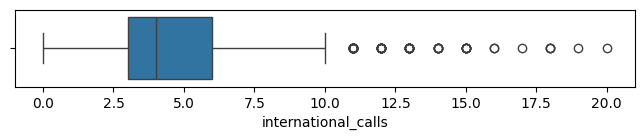

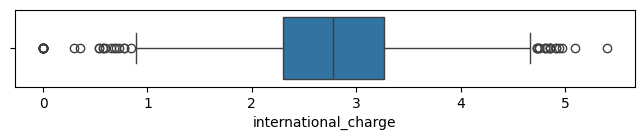

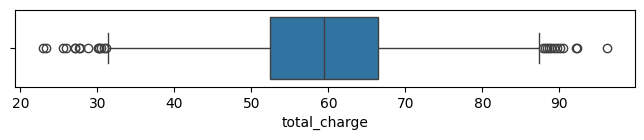

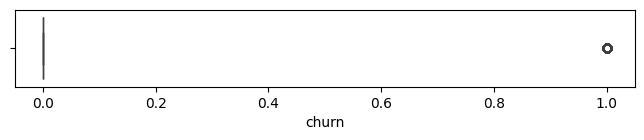

In [16]:
for column in df:
    plt.figure(figsize=(8,1))
    sns.boxplot(data=df, x=column)
plt.show()


### Heatmap of features

<Axes: >

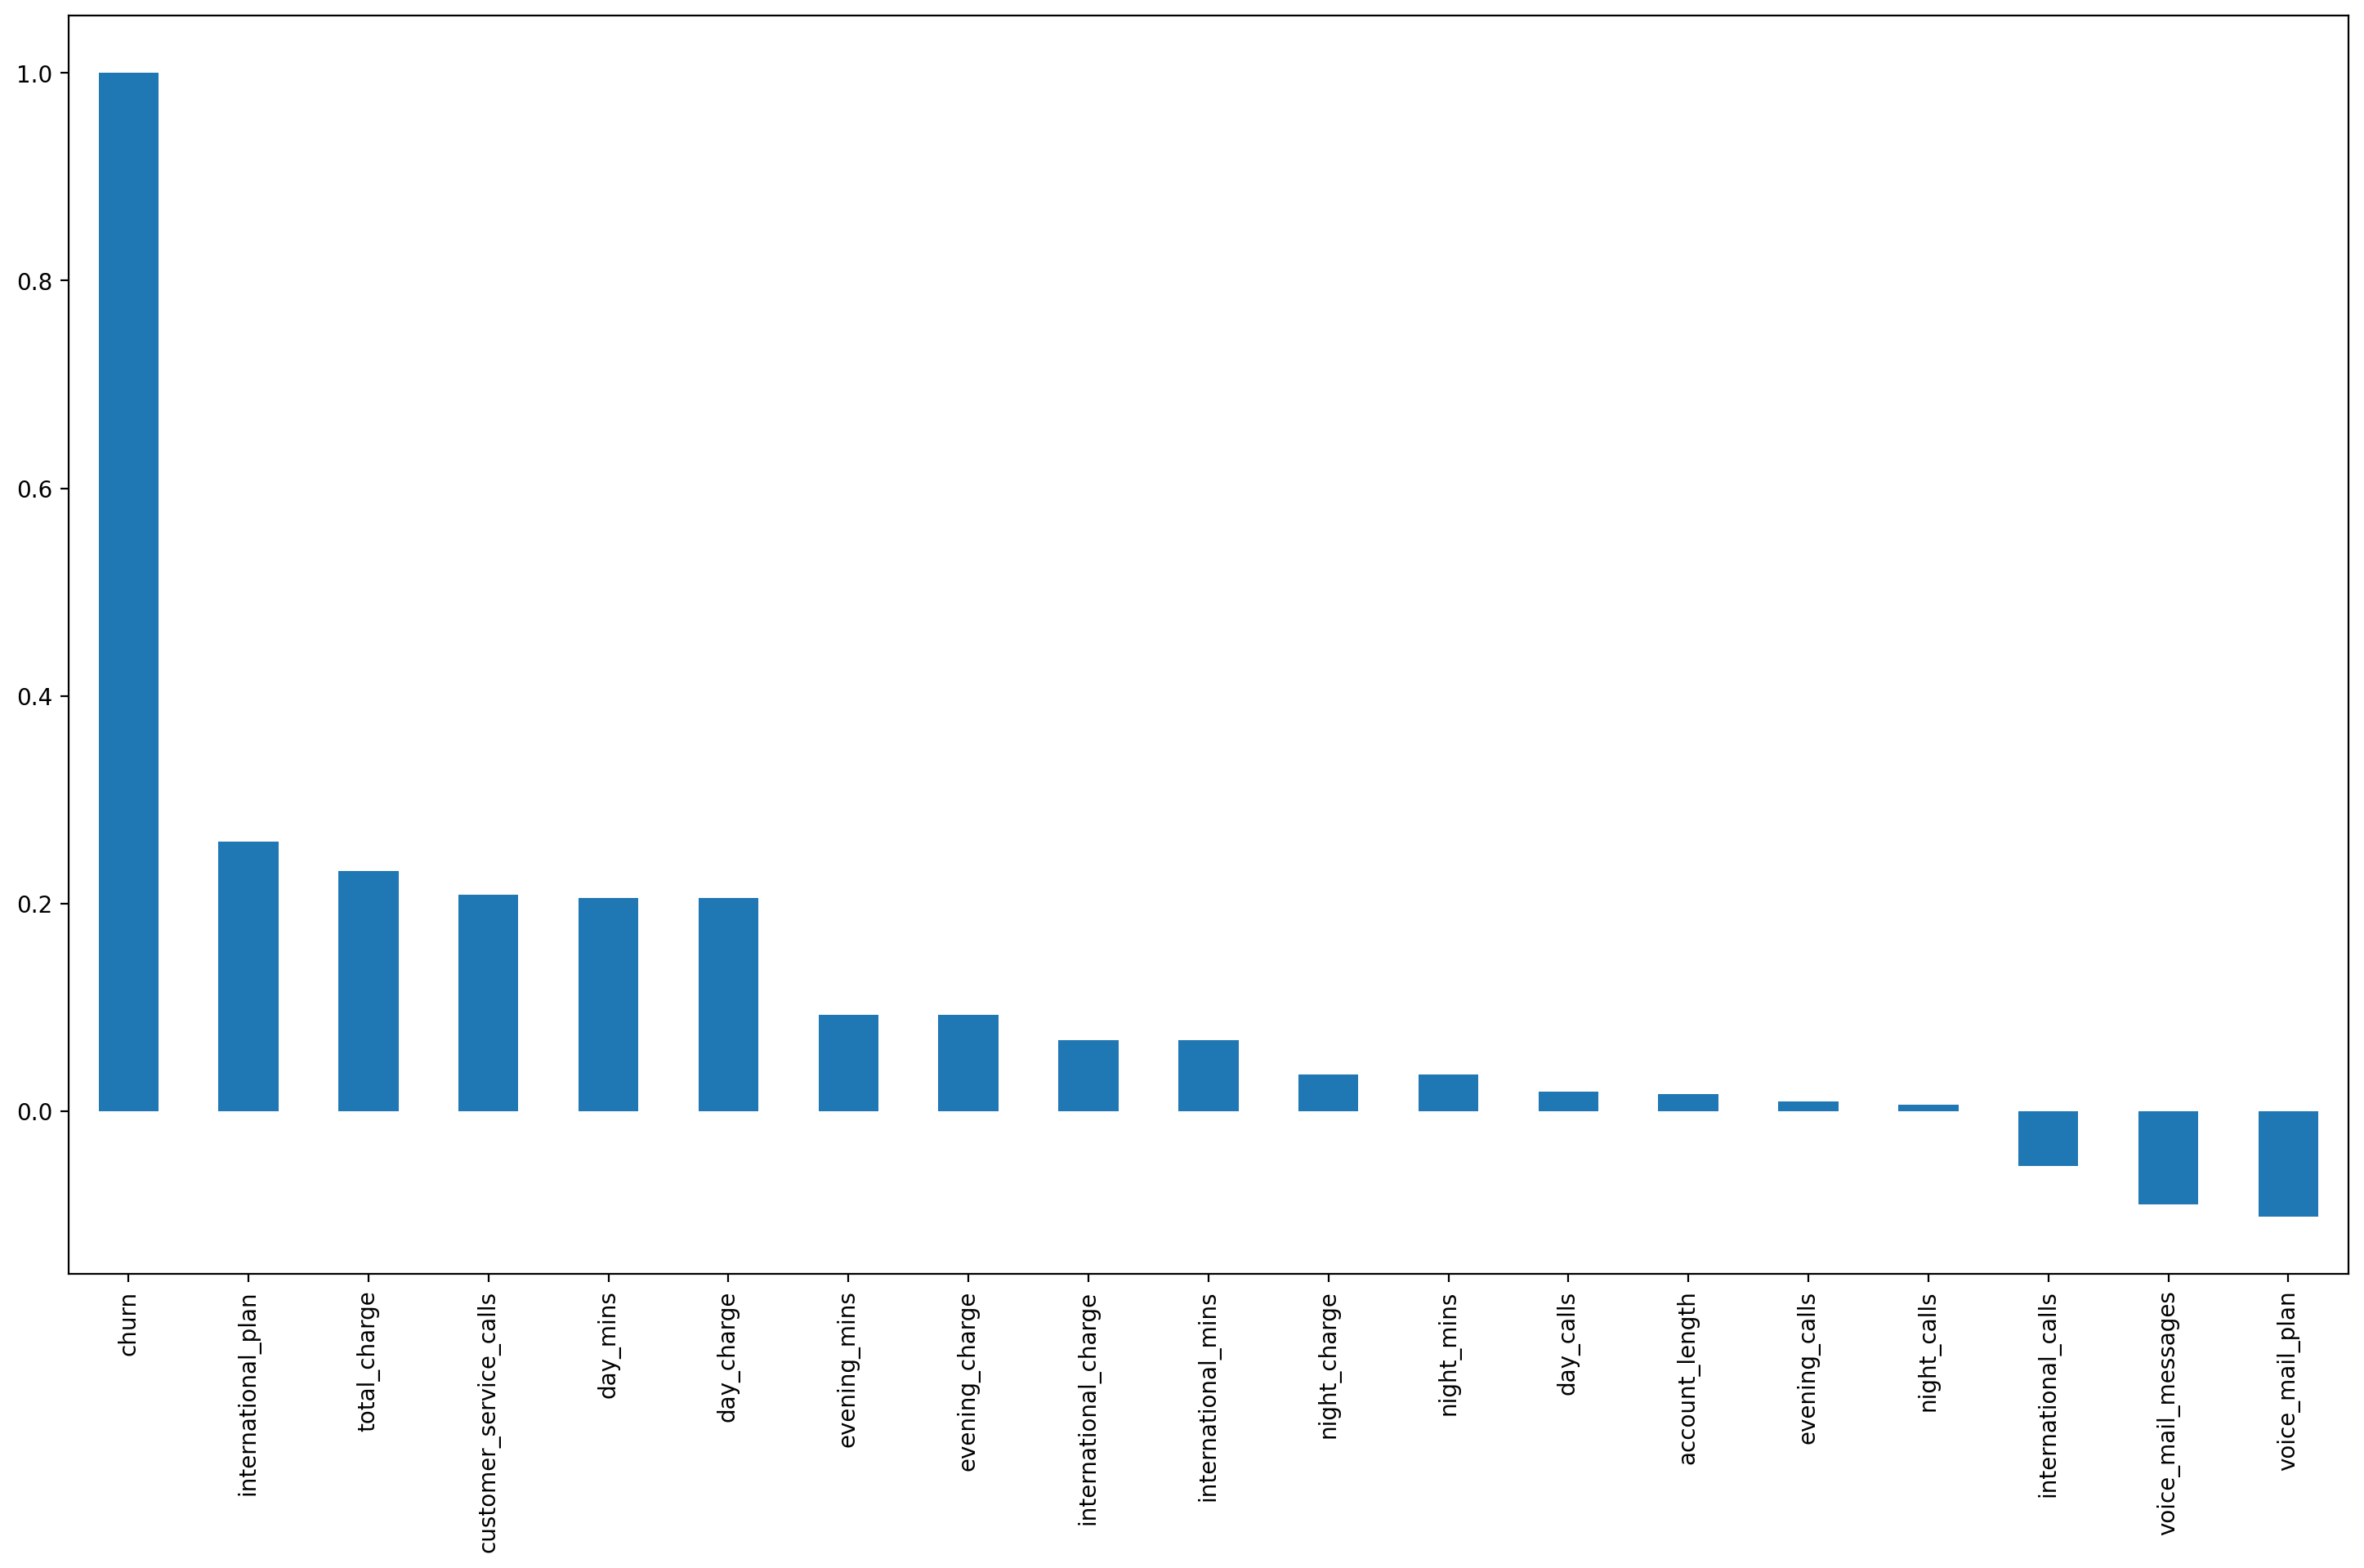

In [17]:
plt.figure(figsize=(18,10), dpi=200)
df.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

## Isolation forest anomaly detection is to find outliers

In [18]:
from sklearn.ensemble import IsolationForest

In [19]:
clf = IsolationForest(random_state=10,contamination=.01)

In [20]:
clf.fit(df)

IsolationForest(contamination=0.01, random_state=10)

In [21]:
y_pred_outliers = clf.predict(df)

In [22]:
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1], shape=(3333,))

In [23]:
df['scores']=clf.decision_function(df)

In [24]:
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,scores
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56,0,0.135961
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24,0,0.136655
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29,0,0.155450
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80,0,-0.006286
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09,0,0.118307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10,0,0.087604
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53,0,0.126628
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74,0,0.117966
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53,0,0.020191


In [25]:
df['anomaly']=clf.predict(df.iloc[:,0:19])

In [26]:
df

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,scores,anomaly
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,...,99,16.78,91,11.01,3,2.70,75.56,0,0.135961,1
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,...,103,16.62,103,11.45,3,3.70,59.24,0,0.136655,1
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,...,110,10.30,104,7.32,5,3.29,62.29,0,0.155450,1
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,88,5.26,89,8.86,7,1.78,66.80,0,-0.006286,-1
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,...,122,12.61,121,8.41,3,2.73,52.09,0,0.118307,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,...,126,18.32,83,12.56,6,2.67,60.10,0,0.087604,1
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,...,55,13.04,123,8.61,4,2.59,63.53,0,0.126628,1
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,...,58,24.55,91,8.64,6,3.81,67.74,0,0.117966,1
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,...,84,13.57,137,6.26,10,1.35,57.53,0,0.020191,1


In [27]:
len(df[df['anomaly']==-1])

34

In [28]:
df[df['anomaly']==-1]   # so we have 34 outliers

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,...,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge,churn,scores,anomaly
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,...,88,5.26,89,8.86,7,1.78,66.80,0,-0.006286,-1
15,161,0,0,332.9,317.8,160.6,5.4,4,0,67,...,97,27.01,128,7.23,9,1.46,92.29,1,-0.028853,-1
21,77,0,0,62.4,169.9,209.6,5.7,5,0,89,...,121,14.44,64,9.43,6,1.54,36.02,1,-0.000431,-1
41,135,1,41,173.1,203.9,122.2,14.6,0,1,85,...,107,17.33,78,5.50,15,3.94,56.20,1,-0.018784,-1
77,144,0,0,61.6,77.1,173.0,8.2,4,0,117,...,85,6.55,99,7.79,7,2.21,27.02,1,-0.002987,-1
115,36,1,42,196.8,254.9,138.3,20.0,0,1,89,...,122,21.67,126,6.22,6,5.40,66.75,1,-0.028080,-1
198,131,1,26,292.9,199.7,255.3,13.8,4,1,101,...,97,16.97,127,11.49,7,3.73,81.98,1,-0.012582,-1
250,33,1,29,157.4,117.9,279.2,13.9,4,0,99,...,80,10.02,79,12.56,11,3.75,53.09,1,-0.003501,-1
343,98,1,21,64.6,176.1,244.8,0.0,2,0,98,...,86,14.97,84,11.02,0,0.00,36.97,0,-0.010257,-1
473,72,1,33,96.6,315.4,163.3,6.2,4,0,59,...,98,26.81,117,7.35,4,1.67,52.25,1,-0.000008,-1


## Splitting te data into X nd y

In [29]:
X=df.iloc[:,0:18]
Y=df['churn']

In [30]:
X

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53


In [31]:
Y

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [34]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF.fit(X_train, Y_train)
RF.score(X_test, Y_test)
from sklearn.feature_selection import RFE       # recursive feature eliminaton
rfe = RFE(estimator=RF, n_features_to_select=15)
model = rfe.fit(X_train, Y_train)

In [35]:
model.support_

array([False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True])

In [36]:
features=pd.DataFrame(zip(X_train.columns, model.support_),columns=["feature", "weight"],).sort_values("weight",ascending=False).reset_index(drop=True)
features

,feature,weight
0,day_calls,True
1,international_plan,True
2,international_charge,True
3,international_calls,True
4,night_charge,True
5,evening_charge,True
6,day_charge,True
7,voice_mail_plan,True
8,total_charge,True
9,customer_service_calls,True


In [37]:
X

,account_length,voice_mail_plan,voice_mail_messages,day_mins,evening_mins,night_mins,international_mins,customer_service_calls,international_plan,day_calls,day_charge,evening_calls,evening_charge,night_calls,night_charge,international_calls,international_charge,total_charge
0,128,1,25,265.1,197.4,244.7,10.0,1,0,110,45.07,99,16.78,91,11.01,3,2.70,75.56
1,107,1,26,161.6,195.5,254.4,13.7,1,0,123,27.47,103,16.62,103,11.45,3,3.70,59.24
2,137,0,0,243.4,121.2,162.6,12.2,0,0,114,41.38,110,10.30,104,7.32,5,3.29,62.29
3,84,0,0,299.4,61.9,196.9,6.6,2,1,71,50.90,88,5.26,89,8.86,7,1.78,66.80
4,75,0,0,166.7,148.3,186.9,10.1,3,1,113,28.34,122,12.61,121,8.41,3,2.73,52.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,192,1,36,156.2,215.5,279.1,9.9,2,0,77,26.55,126,18.32,83,12.56,6,2.67,60.10
3329,68,0,0,231.1,153.4,191.3,9.6,3,0,57,39.29,55,13.04,123,8.61,4,2.59,63.53
3330,28,0,0,180.8,288.8,191.9,14.1,2,0,109,30.74,58,24.55,91,8.64,6,3.81,67.74
3331,184,0,0,213.8,159.6,139.2,5.0,2,1,105,36.35,84,13.57,137,6.26,10,1.35,57.53


### By doing the feture selection we are removing evening_calls, night_calls & account_length

In [38]:
X2=df[['day_calls','international_plan','international_charge','international_calls','night_charge','evening_charge',
      'day_charge','voice_mail_plan','total_charge','customer_service_calls','international_mins',
      'night_mins','evening_mins','day_mins','voice_mail_messages']]

           
Y2=df['churn']

In [39]:
X2

,day_calls,international_plan,international_charge,international_calls,night_charge,evening_charge,day_charge,voice_mail_plan,total_charge,customer_service_calls,international_mins,night_mins,evening_mins,day_mins,voice_mail_messages
0,110,0,2.70,3,11.01,16.78,45.07,1,75.56,1,10.0,244.7,197.4,265.1,25
1,123,0,3.70,3,11.45,16.62,27.47,1,59.24,1,13.7,254.4,195.5,161.6,26
2,114,0,3.29,5,7.32,10.30,41.38,0,62.29,0,12.2,162.6,121.2,243.4,0
3,71,1,1.78,7,8.86,5.26,50.90,0,66.80,2,6.6,196.9,61.9,299.4,0
4,113,1,2.73,3,8.41,12.61,28.34,0,52.09,3,10.1,186.9,148.3,166.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,77,0,2.67,6,12.56,18.32,26.55,1,60.10,2,9.9,279.1,215.5,156.2,36
3329,57,0,2.59,4,8.61,13.04,39.29,0,63.53,3,9.6,191.3,153.4,231.1,0
3330,109,0,3.81,6,8.64,24.55,30.74,0,67.74,2,14.1,191.9,288.8,180.8,0
3331,105,1,1.35,10,6.26,13.57,36.35,0,57.53,2,5.0,139.2,159.6,213.8,0


In [40]:
Y2

0       0
1       0
2       0
3       0
4       0
       ..
3328    0
3329    0
3330    0
3331    0
3332    0
Name: churn, Length: 3333, dtype: int64

In [41]:
df4=df[['day_calls','international_plan','international_charge','international_calls','night_charge','evening_charge',
      'day_charge','voice_mail_plan','total_charge','customer_service_calls','international_mins',
      'night_mins','evening_mins','day_mins','voice_mail_messages']]

### df4 is our final data set for model building

In [42]:
df4.columns

Index(['day_calls', 'international_plan', 'international_charge',
       'international_calls', 'night_charge', 'evening_charge', 'day_charge',
       'voice_mail_plan', 'total_charge', 'customer_service_calls',
       'international_mins', 'night_mins', 'evening_mins', 'day_mins',
       'voice_mail_messages'],
      dtype='object')

In [43]:
df4.describe()

,day_calls,international_plan,international_charge,international_calls,night_charge,evening_charge,day_charge,voice_mail_plan,total_charge,customer_service_calls,international_mins,night_mins,evening_mins,day_mins,voice_mail_messages
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,100.435644,0.096910,2.764581,4.479448,9.039325,17.083540,30.562307,0.276628,59.449754,1.562856,10.237294,200.872037,200.980348,179.775098,8.099010
std,20.069084,0.295879,0.753773,2.461214,2.275873,4.310668,9.259435,0.447398,10.502261,1.315491,2.791840,50.573847,50.713844,54.467389,13.688365
min,0.000000,0.000000,0.000000,0.000000,1.040000,0.000000,0.000000,0.000000,22.930000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000
25%,87.000000,0.000000,2.300000,3.000000,7.520000,14.160000,24.430000,0.000000,52.380000,1.000000,8.500000,167.000000,166.600000,143.700000,0.000000
50%,101.000000,0.000000,2.780000,4.000000,9.050000,17.120000,30.500000,0.000000,59.470000,1.000000,10.300000,201.200000,201.400000,179.400000,0.000000
75%,114.000000,0.000000,3.270000,6.000000,10.590000,20.000000,36.790000,1.000000,66.480000,2.000000,12.100000,235.300000,235.300000,216.400000,20.000000
max,165.000000,1.000000,5.400000,20.000000,17.770000,30.910000,59.640000,1.000000,96.150000,9.000000,20.000000,395.000000,363.700000,350.800000,51.000000


## Model building

Training-set accuracy score: 0.844
              precision    recall  f1-score   support

           0       0.86      0.98      0.91      1987
           1       0.37      0.07      0.12       346

    accuracy                           0.84      2333
   macro avg       0.61      0.52      0.52      2333
weighted avg       0.79      0.84      0.80      2333

Testing-set accuracy score: 0.863
              precision    recall  f1-score   support

           0       0.87      0.99      0.93       863
           1       0.50      0.05      0.09       137

    accuracy                           0.86      1000
   macro avg       0.68      0.52      0.51      1000
weighted avg       0.82      0.86      0.81      1000



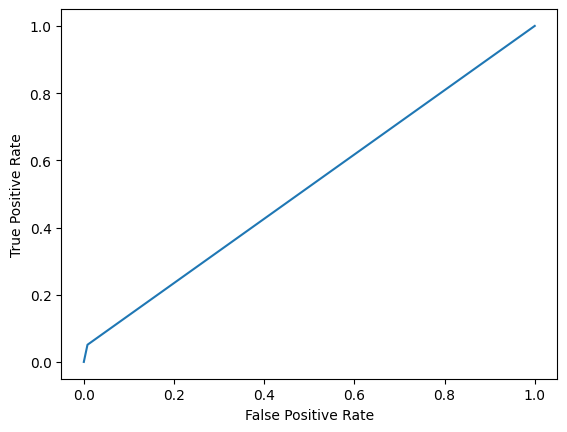

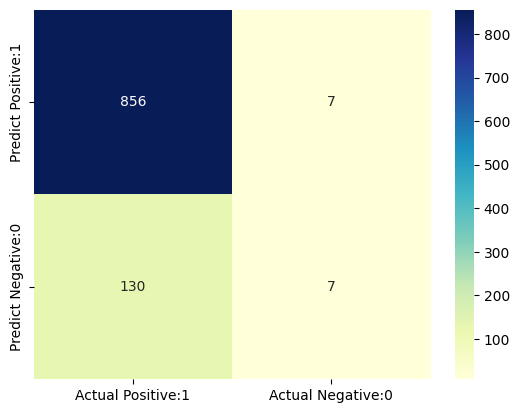

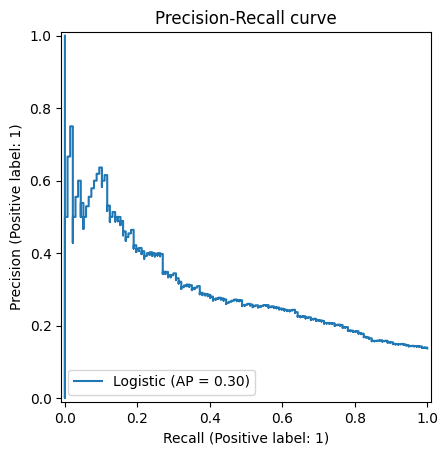

In [44]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,Y_train)
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

y_pred_train = classifier.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

from sklearn.metrics import PrecisionRecallDisplay


# visualize confusion matrix with seaborn heatmap
import seaborn as sns
cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


display = PrecisionRecallDisplay.from_estimator(
    classifier, X_test, Y_test, name="Logistic"
)
_ = display.ax_.set_title("Precision-Recall curve")


# model accuracy using feature selection and using oversampling

### Logistic regression

Training-set accuracy score: 0.708
              precision    recall  f1-score   support

           0       0.72      0.68      0.70      2286
           1       0.70      0.73      0.71      2274

    accuracy                           0.71      4560
   macro avg       0.71      0.71      0.71      4560
weighted avg       0.71      0.71      0.71      4560

Testing-set accuracy score: 0.694
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       564
           1       0.69      0.71      0.70       576

    accuracy                           0.69      1140
   macro avg       0.69      0.69      0.69      1140
weighted avg       0.69      0.69      0.69      1140



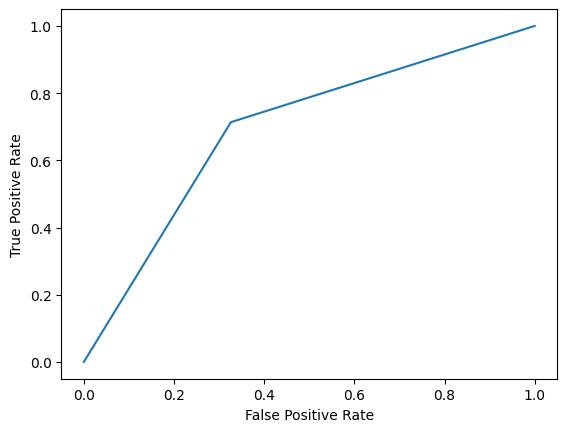

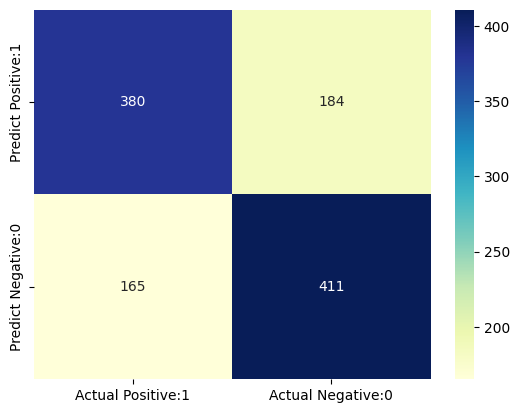

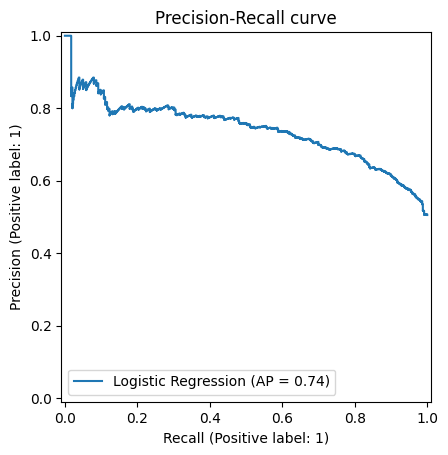

In [49]:
import imblearn
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
#X,Y=df4.iloc[:,:-1],df4.iloc[:,-1]
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.2, random_state = 40)
classifier1 = LogisticRegression()
classifier1.fit(X_train,Y_train)
y_pred_train = classifier1.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier1.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier1, X_test, Y_test, name="Logistic Regression"
)
_ = display.ax_.set_title("Precision-Recall curve")


### Random forest classifier

In [50]:
from imblearn.over_sampling import SMOTE

Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      3990
   macro avg       1.00      1.00      1.00      3990
weighted avg       1.00      1.00      1.00      3990

Testing-set accuracy score: 0.926
              precision    recall  f1-score   support

           0       0.88      0.97      0.93       818
           1       0.97      0.88      0.93       892

    accuracy                           0.93      1710
   macro avg       0.93      0.93      0.93      1710
weighted avg       0.93      0.93      0.93      1710



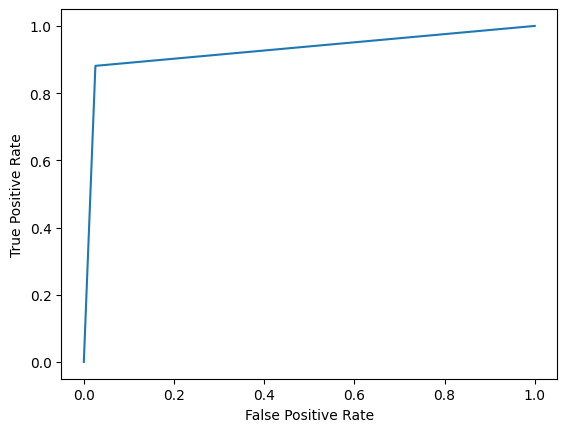

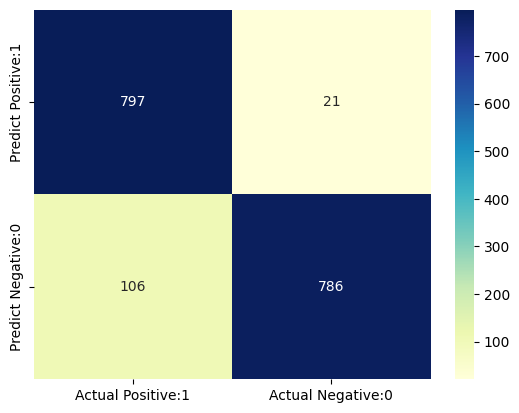

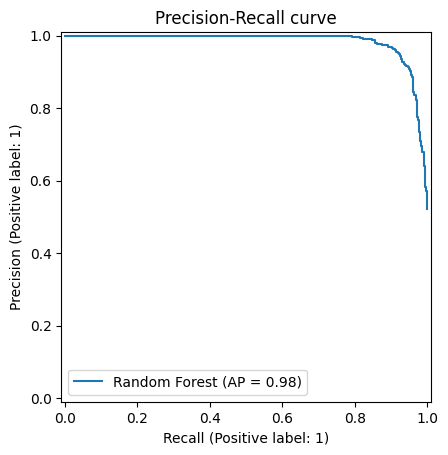

In [51]:
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier2 = RandomForestClassifier()
classifier2.fit(X_train,Y_train)
y_pred_train = classifier2.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier2.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier2, X_test, Y_test, name="Random Forest"
)
_ = display.ax_.set_title("Precision-Recall curve")


### Support vector classifier

Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      3990
   macro avg       1.00      1.00      1.00      3990
weighted avg       1.00      1.00      1.00      3990

Testing-set accuracy score: 0.619
              precision    recall  f1-score   support

           0       0.56      1.00      0.72       818
           1       1.00      0.27      0.42       892

    accuracy                           0.62      1710
   macro avg       0.78      0.63      0.57      1710
weighted avg       0.79      0.62      0.56      1710



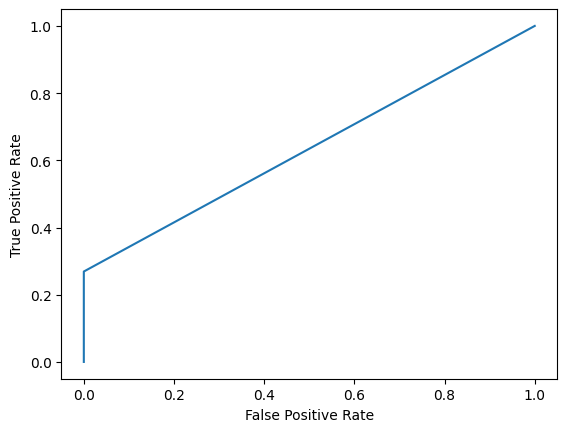

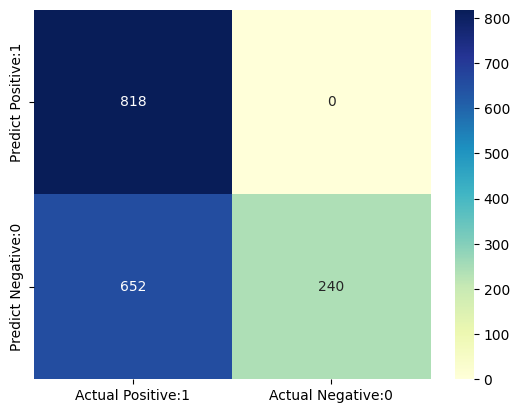

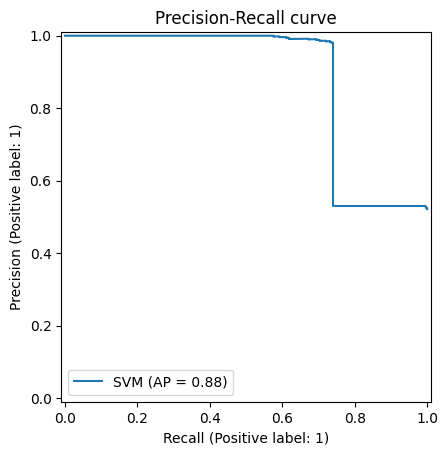

In [52]:
import imblearn
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier3 = SVC(C= 10, gamma = 0.5)
classifier3.fit(X_train,Y_train)
y_pred_train = classifier3.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier3.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier3, X_test, Y_test, name="SVM"
)
_ = display.ax_.set_title("Precision-Recall curve")


### Adaboost classifier

Training-set accuracy score: 0.824
              precision    recall  f1-score   support

           0       0.80      0.87      0.83      2032
           1       0.85      0.77      0.81      1958

    accuracy                           0.82      3990
   macro avg       0.83      0.82      0.82      3990
weighted avg       0.83      0.82      0.82      3990

Testing-set accuracy score: 0.816
              precision    recall  f1-score   support

           0       0.78      0.86      0.82       818
           1       0.86      0.78      0.81       892

    accuracy                           0.82      1710
   macro avg       0.82      0.82      0.82      1710
weighted avg       0.82      0.82      0.82      1710



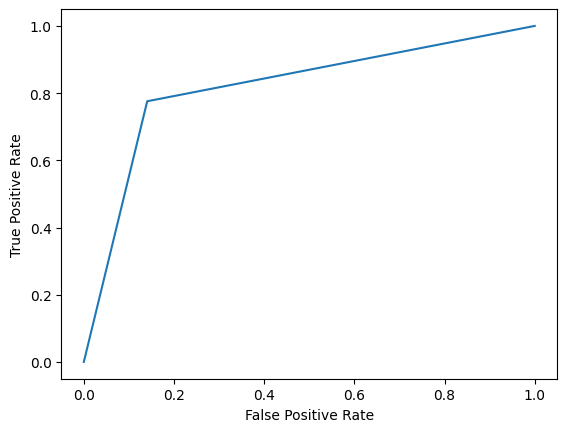

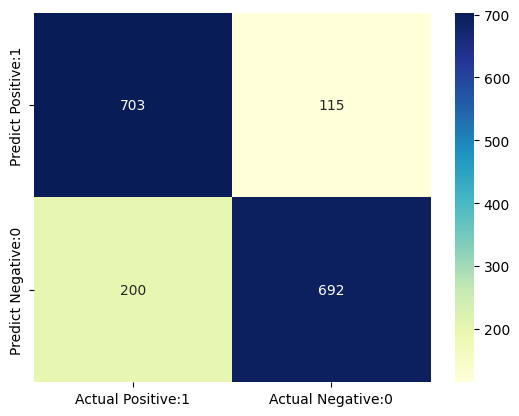

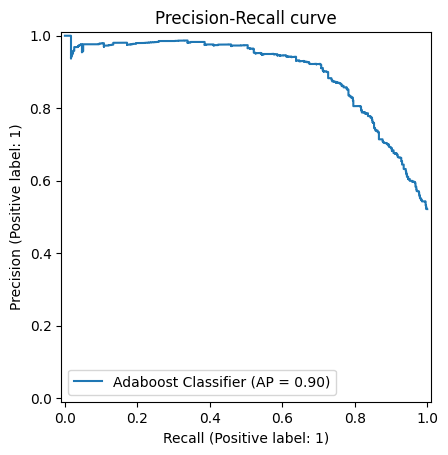

In [53]:
from sklearn.ensemble import AdaBoostClassifier
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier4 = AdaBoostClassifier()
classifier4.fit(X_train,Y_train)
y_pred_train = classifier4.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier4.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier4, X_test, Y_test, name="Adaboost Classifier"
)
_ = display.ax_.set_title("Precision-Recall curve")


### XG Boost classifier

Training-set accuracy score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2032
           1       1.00      1.00      1.00      1958

    accuracy                           1.00      3990
   macro avg       1.00      1.00      1.00      3990
weighted avg       1.00      1.00      1.00      3990

Testing-set accuracy score: 0.93
              precision    recall  f1-score   support

           0       0.90      0.97      0.93       818
           1       0.97      0.90      0.93       892

    accuracy                           0.93      1710
   macro avg       0.93      0.93      0.93      1710
weighted avg       0.93      0.93      0.93      1710



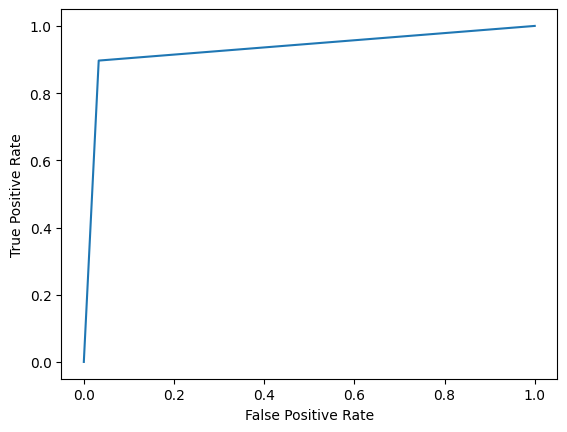

AttributeError: 'super' object has no attribute '__sklearn_tags__'

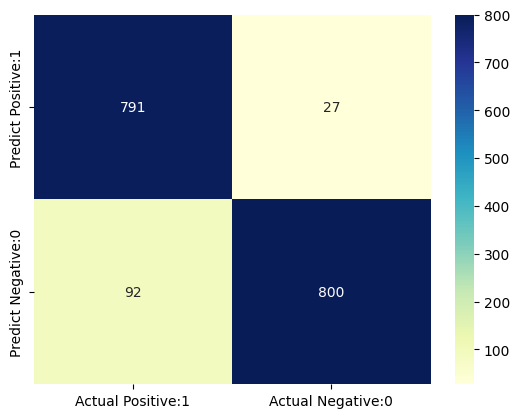

In [54]:
import xgboost as xgb
from xgboost import XGBClassifier
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier5 = XGBClassifier()
classifier5.fit(X_train,Y_train)

y_pred_train = classifier5.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier5.predict(X_test)
print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))


fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier5, X_test, Y_test, name="XGBOOST"
)
_ = display.ax_.set_title("Precision-Recall curve")


In [ ]:
X_train

In [55]:
Y_train

2735    1
393     0
4068    1
5569    1
2409    0
       ..
4722    1
3340    1
5426    1
3064    1
3398    1
Name: churn, Length: 3990, dtype: int64

In [56]:
X_test

,day_calls,international_plan,international_charge,international_calls,night_charge,evening_charge,day_charge,voice_mail_plan,total_charge,customer_service_calls,international_mins,night_mins,evening_mins,day_mins,voice_mail_messages
2385,78,0,3.750000,2,10.840000,21.390000,36.480000,0,72.460000,0,13.900000,240.800000,251.700000,214.600000,0
3228,81,0,4.050000,6,7.440000,17.920000,39.460000,0,68.870000,5,15.000000,165.400000,210.800000,232.100000,0
2627,85,0,3.380000,1,11.120000,25.150000,25.640000,0,65.290000,1,12.500000,247.200000,295.900000,150.800000,0
4932,100,0,2.601514,4,8.307453,16.186193,35.280919,0,62.376079,0,9.644727,184.653866,190.418118,207.517902,0
3601,110,0,3.432351,2,11.924959,18.765076,43.095951,0,77.218337,1,12.724446,264.949125,220.750875,253.505602,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2198,105,0,0.890000,5,4.540000,15.450000,44.490000,0,65.370000,0,3.300000,100.900000,181.800000,261.700000,0
4009,96,0,3.750000,5,11.127893,18.816997,41.440436,0,75.135327,0,13.900000,247.280626,221.380626,243.790800,0
3118,100,0,1.400000,5,11.400000,16.490000,30.110000,1,59.400000,1,5.200000,253.400000,194.000000,177.100000,33
4721,96,0,2.422558,3,6.603717,14.205199,21.057021,1,44.288495,5,8.959594,146.833934,167.082393,123.882921,28


In [57]:
Y_test

2385    0
3228    0
2627    0
4932    1
3601    1
       ..
2198    0
4009    1
3118    0
4721    1
4186    1
Name: churn, Length: 1710, dtype: int64

### Multinomial Naive bayes classifier

Training-set accuracy score: 0.604
              precision    recall  f1-score   support

           0       0.63      0.55      0.58      2032
           1       0.58      0.66      0.62      1958

    accuracy                           0.60      3990
   macro avg       0.61      0.60      0.60      3990
weighted avg       0.61      0.60      0.60      3990

Testing-set accuracy score: 0.585
              precision    recall  f1-score   support

           0       0.57      0.54      0.55       818
           1       0.60      0.63      0.61       892

    accuracy                           0.59      1710
   macro avg       0.58      0.58      0.58      1710
weighted avg       0.58      0.59      0.58      1710



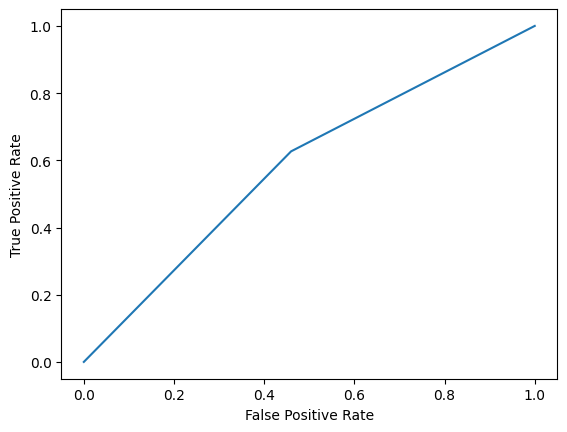

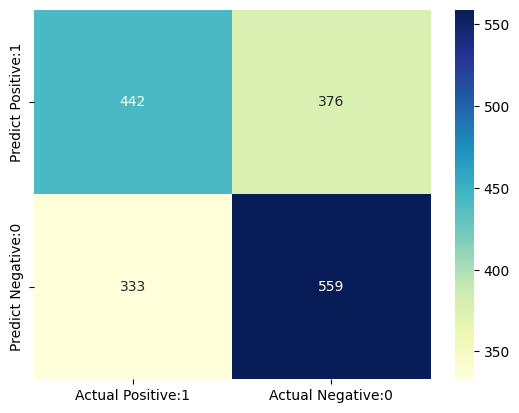

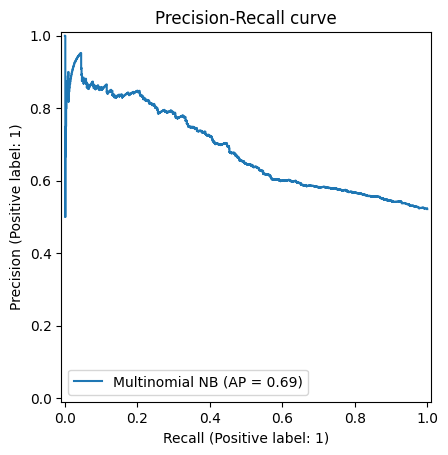

In [58]:
from sklearn.naive_bayes import MultinomialNB
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier6 = MultinomialNB()
classifier6.fit(X_train,Y_train)
y_pred_train = classifier6.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier6.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier6, X_test, Y_test, name="Multinomial NB"
)
_ = display.ax_.set_title("Precision-Recall curve")



### Gaussian Naive bayes classifier

Training-set accuracy score: 0.726
              precision    recall  f1-score   support

           0       0.75      0.70      0.72      2032
           1       0.71      0.75      0.73      1958

    accuracy                           0.73      3990
   macro avg       0.73      0.73      0.73      3990
weighted avg       0.73      0.73      0.73      3990

Testing-set accuracy score: 0.713
              precision    recall  f1-score   support

           0       0.70      0.70      0.70       818
           1       0.73      0.72      0.73       892

    accuracy                           0.71      1710
   macro avg       0.71      0.71      0.71      1710
weighted avg       0.71      0.71      0.71      1710



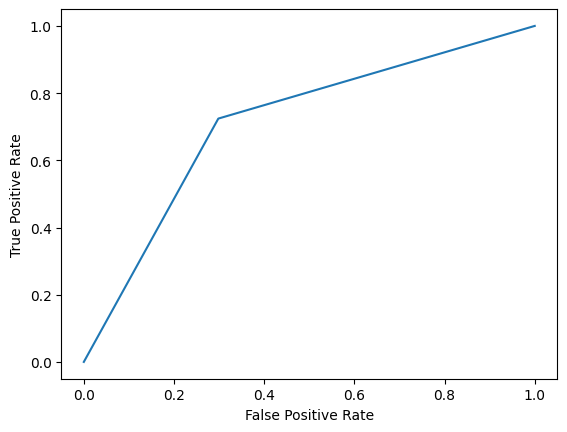

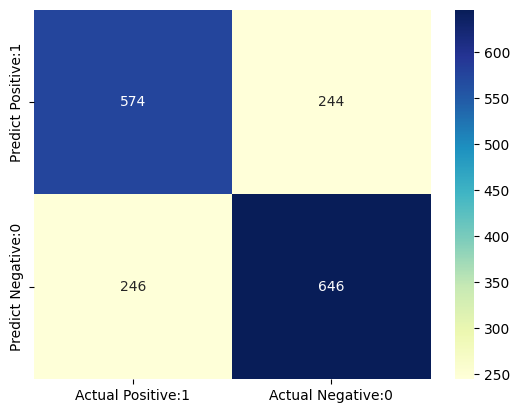

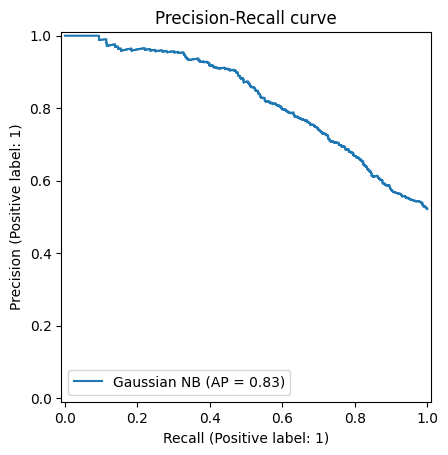

In [59]:
from sklearn.naive_bayes import GaussianNB
oversample = SMOTE()
X3, Y3 = oversample.fit_resample(X2, Y2)
X_train, X_test, Y_train, Y_test = train_test_split(X3,Y3, test_size = 0.3, random_state = 40)
classifier7 = GaussianNB()
classifier7.fit(X_train,Y_train)
y_pred_train = classifier7.predict(X_train)
print(f'Training-set accuracy score: {round(accuracy_score(Y_train, y_pred_train),3)}')
print(classification_report(Y_train, y_pred_train))


y_pred_test = classifier7.predict(X_test)

print(f'Testing-set accuracy score: {round(accuracy_score(Y_test, y_pred_test),3)}')
print(classification_report(Y_test, y_pred_test))
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_test)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

cm = confusion_matrix(Y_test,y_pred_test)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier7, X_test, Y_test, name="Gaussian NB"
)
_ = display.ax_.set_title("Precision-Recall curve")



### ROC curve of all th classification algorithms

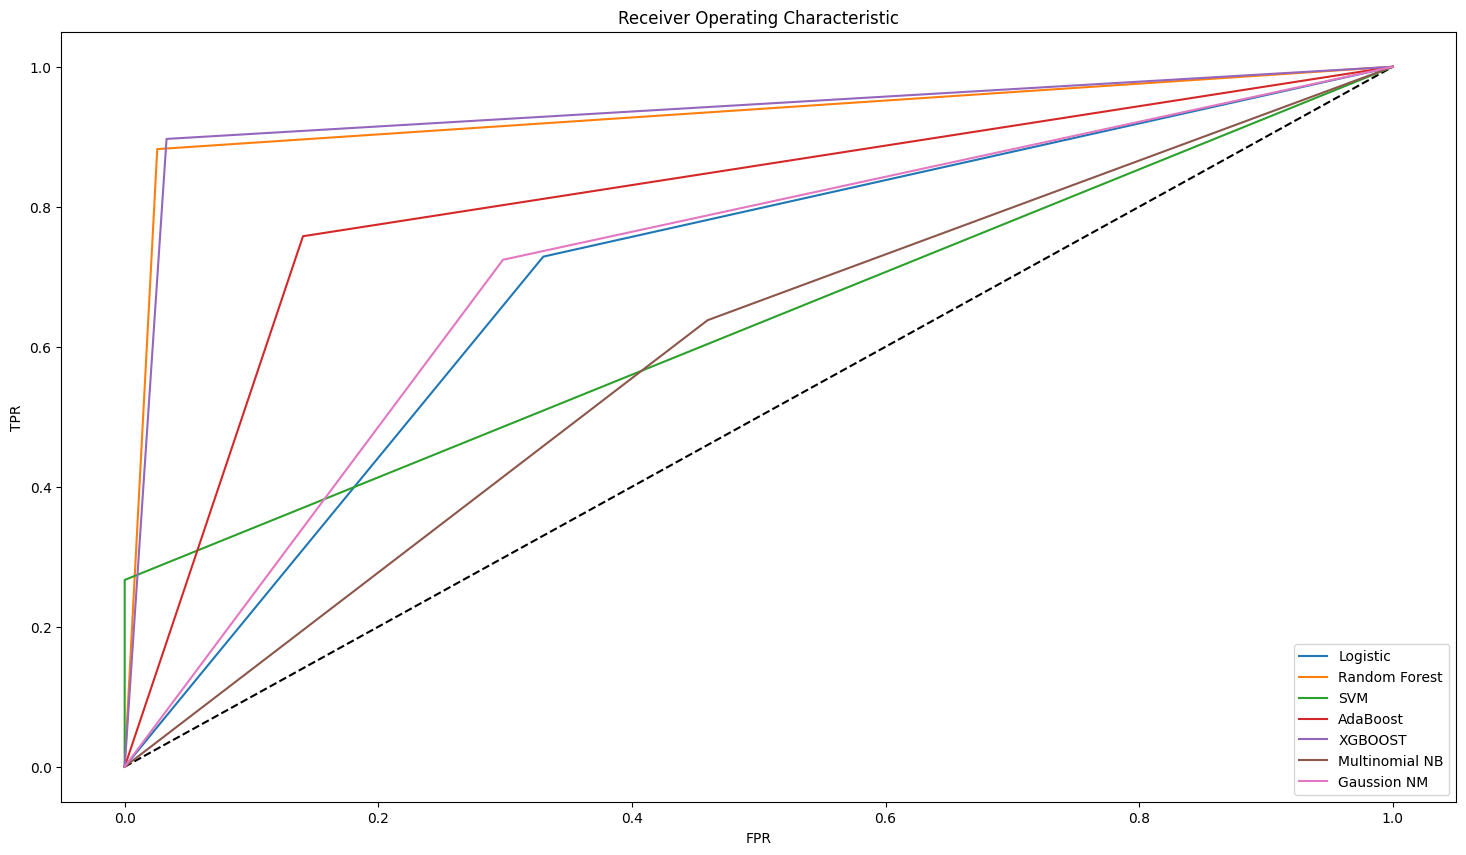

In [60]:
from sklearn.metrics import roc_curve
plt.figure(figsize=(18,10))
y_pred1 = classifier1.predict(X_test)
fpr1 , tpr1, thresholds1 = roc_curve(Y_test, y_pred1)

y_pred2 = classifier2.predict(X_test)
fpr2 , tpr2, thresholds2 = roc_curve(Y_test, y_pred2)


y_pred3 = classifier3.predict(X_test)
fpr3 , tpr3, thresholds3 = roc_curve(Y_test, y_pred3)

y_pred4 = classifier4.predict(X_test)
fpr4 , tpr4, thresholds4 = roc_curve(Y_test, y_pred4)

y_pred5 = classifier5.predict(X_test)
fpr5 , tpr5, thresholds5 = roc_curve(Y_test, y_pred5)

y_pred6 = classifier6.predict(X_test)
fpr6 , tpr6, thresholds6 = roc_curve(Y_test, y_pred6)

y_pred7 = classifier7.predict(X_test)
fpr7 , tpr7, thresholds7 = roc_curve(Y_test, y_pred7)


plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr1, tpr1, label= "Logistic")
plt.plot(fpr2, tpr2, label= "Random Forest")
plt.plot(fpr3, tpr3, label= "SVM")
plt.plot(fpr4, tpr4, label= "AdaBoost")
plt.plot(fpr5, tpr5, label= "XGBOOST")
plt.plot(fpr6, tpr6, label= "Multinomial NB")
plt.plot(fpr7, tpr7, label= "Gaussion NM")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title('Receiver Operating Characteristic')
plt.show()

# We got the best accuracy in XG Boost and Random forest, we are considering Random forest as final model training 100% and testing 93.66% 

### SweetViz

In [ ]:
#!pip install sweetviz

In [115]:
#import sweetviz as sv

In [ ]:
#sweet_report = sv.analyze(df4)
#sweet_report.show_html('telecom_report1.html')

## Deployment

In [110]:
#pip install streamlit

In [61]:
import pickle
pickle_out = open("model.pkl","wb")
pickle.dump(classifier5,pickle_out)                      # classifier 2 is random forest
pickle_out.close()